In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#pybrain net
import pybrain
from pybrain.datasets import UnsupervisedDataSet, SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.validation import Validator

#scikit-learn
from sklearn.neural_network import MLPClassifier

In [2]:
def print_pred2(dataset, network):
    df = pd.DataFrame(dataset.data['sample'][:dataset.getLength()])
    prediction = np.round(network.activateOnDataset(dataset),3)
    df['output'] = pd.DataFrame(prediction)
    return df

In [3]:
a_b=[[[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0],[1,0,0]],
[[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1],[1,0,0]],#
[[1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0],[1,0,0]],
[[1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1],[1,0,0]],
[[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0],[1,0,0]],
[[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0],[1,0,0]],
[[1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0],[0,1,0]],
[[1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1],[0,1,0]],
[[1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],[0,1,0]],#
[[1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1],[0,1,0]],
[[1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0],[0,1,0]],
[[1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0],[0,1,0]],
[[1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,1]],#
[[1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0],[0,0,1]],
[[1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],[0,0,1]],
[[1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0],[0,0,1]],
[[1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0],[0,0,1]],
[[1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0],[0,0,1]]]
#a_b

In [4]:
Dtrain = SupervisedDataSet(20,3) # define a dataset in pybrain
#Dtrain.addSample([0,0],[0])
[Dtrain.addSample(smpl[0],smpl[1]) for smpl in a_b]
print(Dtrain)

input: dim(30, 20)
[[ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   1.  0.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  1.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  1.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. 

In [5]:
validator =  Validator()
net = buildNetwork(20,4,3, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)
T = BackpropTrainer(net, learningrate=0.01, momentum=0.99)

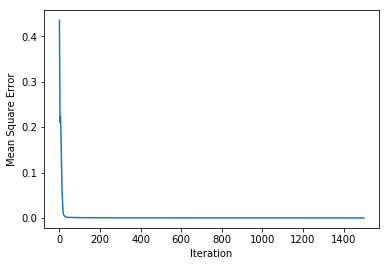

In [6]:
scores = []
for i in xrange(1500):
    T.trainOnDataset(Dtrain, 1)
    prediction = net.activateOnDataset(Dtrain)
    scores.append(validator.MSE(prediction, Dtrain.getField('target')))
plt.ylabel('Mean Square Error')
plt.xlabel('Iteration')
plt.plot(scores)

In [7]:
#T.trainOnDataset(Dtrain, 1000)
#print net.params

In [8]:
#[[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1],[1,0,0]], #A-BCE #No entrenado
#[[1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0],[0,1,0]], #A-DBC #No entrenado
#[[1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0],[0,0,1]], #A-CDB #No entrenado
#[1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1]# A-CDE #No entrenado
#[1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1]# A-DCE #No entrenado
#[0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0]#B-CAD #Test de simetría #No entrenado
in_vals=[0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0]

net.activate(in_vals)

array([ 0.04127812,  0.51567794,  0.16667522])

In [9]:
[[net.activate(in_val[0]),in_val[1]] for in_val in a_b]

[[array([ 0.99125815,  0.00738035,  0.00484676]), [1, 0, 0]],
 [array([ 0.99041646,  0.00696987,  0.00561261]), [1, 0, 0]],
 [array([ 0.99160415,  0.00598634,  0.00536235]), [1, 0, 0]],
 [array([ 0.99165637,  0.00651177,  0.00505679]), [1, 0, 0]],
 [array([ 0.99288614,  0.00655925,  0.00458241]), [1, 0, 0]],
 [array([ 0.99315129,  0.0070941 ,  0.00411608]), [1, 0, 0]],
 [array([ 0.01066339,  0.98924907,  0.0080637 ]), [0, 1, 0]],
 [array([ 0.01041506,  0.98888184,  0.00854584]), [0, 1, 0]],
 [array([ 0.00965856,  0.9883254 ,  0.00969718]), [0, 1, 0]],
 [array([ 0.00947304,  0.98889163,  0.00944802]), [0, 1, 0]],
 [array([ 0.01067725,  0.98849723,  0.00865245]), [0, 1, 0]],
 [array([ 0.0108285 ,  0.98908884,  0.00808917]), [0, 1, 0]],
 [array([ 0.00450206,  0.00479973,  0.99252516]), [0, 0, 1]],
 [array([ 0.00506648,  0.00484658,  0.99225759]), [0, 0, 1]],
 [array([ 0.0033069 ,  0.0052817 ,  0.99414681]), [0, 0, 1]],
 [array([ 0.00458072,  0.00449223,  0.99328872]), [0, 0, 1]],
 [array(

In [10]:
test_simetr_AB=[[[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0],[1,0,0]],
                [[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],[1,0,0]],
                [[0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0],[1,0,0]],
                [[0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],[1,0,0]],
                [[0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0],[1,0,0]],
                [[0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0],[1,0,0]],
                [[0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0],[0,1,0]],
                [[0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],[0,1,0]],
                [[0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0],[0,1,0]],
                [[0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1],[0,1,0]],
                [[0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],[0,1,0]],
                [[0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0],[0,1,0]],
                [[0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0],[0,0,1]],
                [[0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0],[0,0,1]],
                [[0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0],[0,0,1]],
                [[0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0],[0,0,1]],
                [[0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0],[0,0,1]],
                [[0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0],[0,0,1]]
               ]

In [11]:
[[net.activate(in_val[0]),in_val[1]] for in_val in test_simetr_AB]

[[array([ 0.80600883,  0.00689755,  0.15063466]), [1, 0, 0]],
 [array([ 0.60479153,  0.00875537,  0.28352666]), [1, 0, 0]],
 [array([ 0.91366263,  0.00369745,  0.09447618]), [1, 0, 0]],
 [array([ 0.86204901,  0.00646539,  0.09831489]), [1, 0, 0]],
 [array([ 0.93788084,  0.00329002,  0.09821448]), [1, 0, 0]],
 [array([ 0.94920494,  0.00429473,  0.06310057]), [1, 0, 0]],
 [array([ 0.04127812,  0.51567794,  0.16667522]), [0, 1, 0]],
 [array([ 0.02825573,  0.39324211,  0.32999677]), [0, 1, 0]],
 [array([ 0.0357158 ,  0.57793225,  0.16371873]), [0, 1, 0]],
 [array([ 0.01569439,  0.64605237,  0.25997104]), [0, 1, 0]],
 [array([ 0.074012  ,  0.27559189,  0.22986599]), [0, 1, 0]],
 [array([ 0.05776914,  0.42631832,  0.16675897]), [0, 1, 0]],
 [array([ 0.11844661,  0.0338713 ,  0.58511682]), [0, 0, 1]],
 [array([ 0.40585223,  0.01331513,  0.44367664]), [0, 0, 1]],
 [array([ 0.03588298,  0.08082373,  0.67989199]), [0, 0, 1]],
 [array([ 0.43129443,  0.01534033,  0.37499288]), [0, 0, 1]],
 [array(

In [ ]:
def simmetry test